# Non-uniform illumination correction experiments

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")

import numpy as np
from PIL import Image

As you it can be seen, the image has an non-uniform lighting that does not allow to apply a single threshold to the image.

<IPython.core.display.Javascript object>


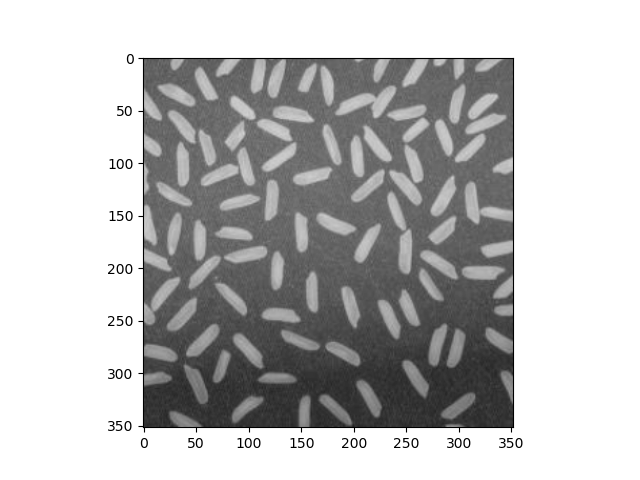

In [2]:
img = np.asarray(Image.open('../imgs/experiments/light/rice.png'), dtype=np.uint32)
img = img[:, :, 0] #np.uint32(np.mean(img, 2))

plt.figure()
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

<IPython.core.display.Javascript object>


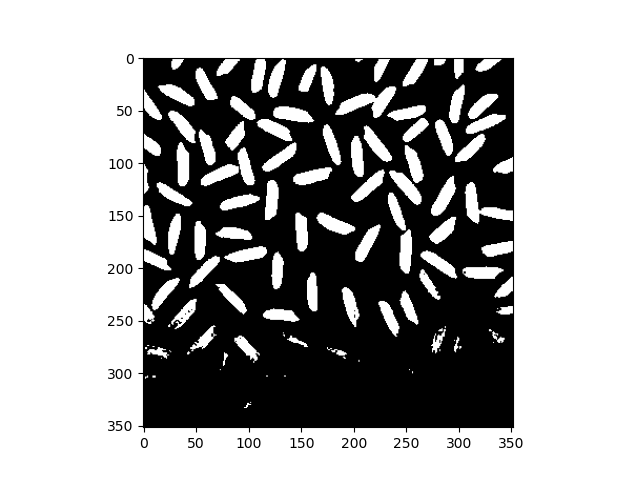

In [3]:
img_bin = img.copy()
img_bin[img_bin <= 150] = 0
img_bin[img_bin > 150] = 1

plt.figure()
plt.imshow(img_bin, cmap='gray', vmin=0, vmax=1)

## Local binarization

## Opening residue

We have implemented the erosion and dilate functions and with them the opening, which consists of eroding and then dilating with the same structuring element.

In [4]:
import Mathematical_Morphology as morpho

Below you can see an example of erosion with a 4x4 square structuring element.

<IPython.core.display.Javascript object>


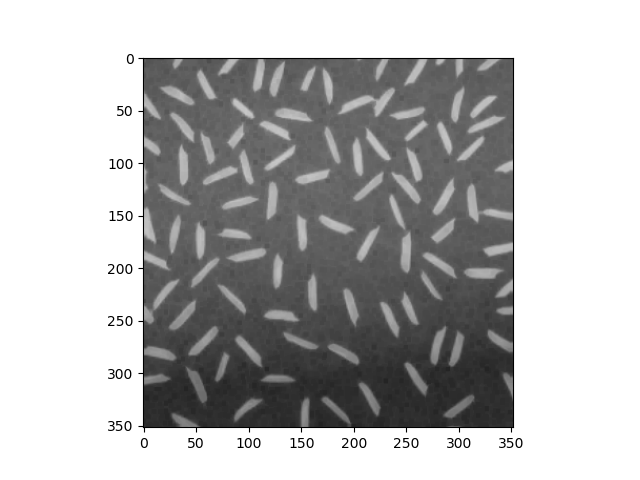

In [5]:
img_er = morpho.erode(img, 4, 4)

plt.figure()
plt.imshow(img_er, cmap='gray', vmin=0, vmax=255)

And below you can now see an example of the dilate also with a square structuring element of 4x4 size.

<IPython.core.display.Javascript object>


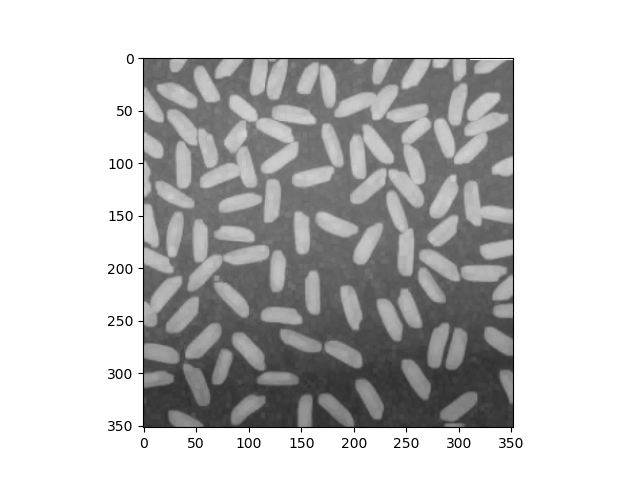

In [6]:
img_dil = morpho.dilate(img, 4, 4)

plt.figure()
plt.imshow(img_dil, cmap='gray', vmin=0, vmax=255)

Below we show the result of the implementation of our opening function, which performs an erosion and then a dilation with the same structuring element.

<IPython.core.display.Javascript object>


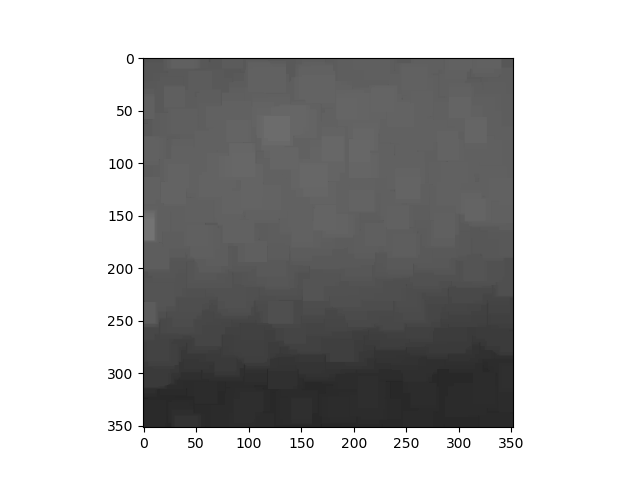

In [7]:
img_op = morpho.opening(img, 20, 20)

plt.figure()
plt.imshow(img_op, cmap='gray', vmin=0, vmax=255)

We show the opening residue, which consists of subtracting the image opening from the original image.

<IPython.core.display.Javascript object>


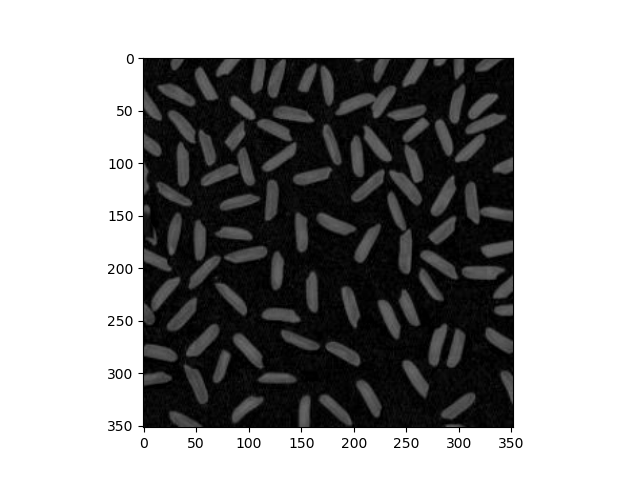

In [8]:
img_op_res = morpho.openingResidue(img, 16, 16)

plt.figure()
plt.imshow(img_op_res, cmap='gray', vmin=0, vmax=255)

Now the opening residue can be correctly binarized with a single global threshold:

<IPython.core.display.Javascript object>


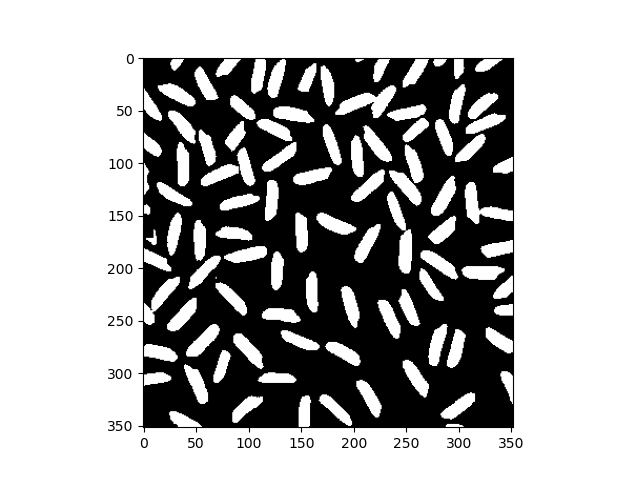

In [9]:
img_op_res_bin = img_op_res.copy()
img_op_res_bin[img_op_res_bin <= 40] = 0
img_op_res_bin[img_op_res_bin > 40] = 1

plt.figure()
plt.imshow(img_op_res_bin, cmap='gray', vmin=0, vmax=1)

Let's see another image as example:

<IPython.core.display.Javascript object>


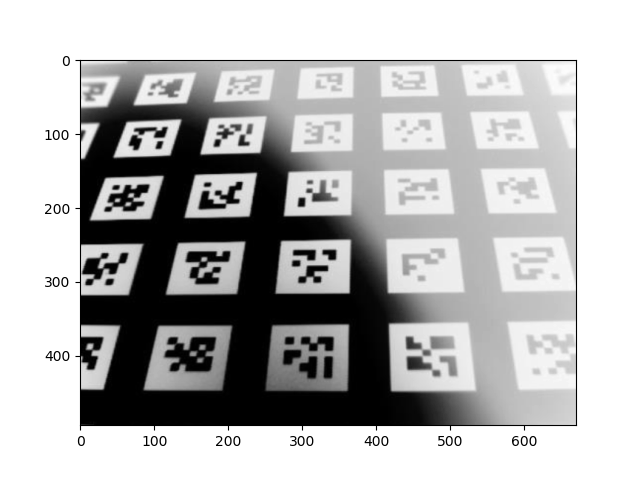

In [10]:
img_q = np.asarray(Image.open('../imgs/experiments/light/q.png'), dtype=np.uint32)
img_q = 255 - np.uint32(np.mean(img_q, 2))

plt.figure()
plt.imshow(img_q, cmap='gray', vmin=0, vmax=255)

Once again, due to the non-uniform illumination we cannot apply a global binarization on the original image:

<IPython.core.display.Javascript object>


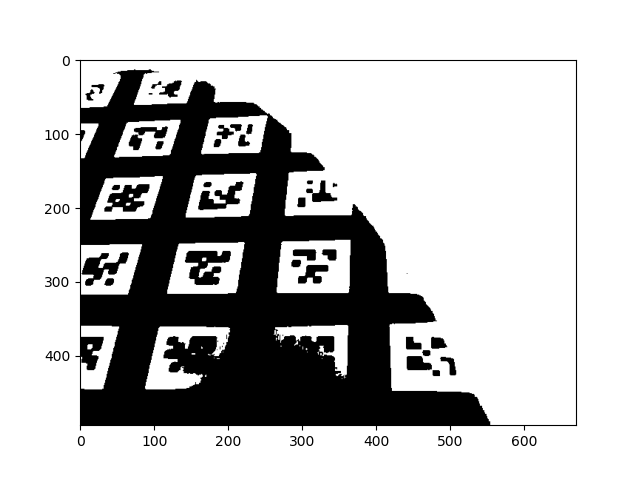

In [11]:
img_q_bin = img_q.copy()
img_q_bin[img_q_bin <= 150] = 0
img_q_bin[img_q_bin > 150] = 1

plt.figure()
plt.imshow(img_q_bin, cmap='gray', vmin=0, vmax=1)

Opening residue of the image:

<IPython.core.display.Javascript object>


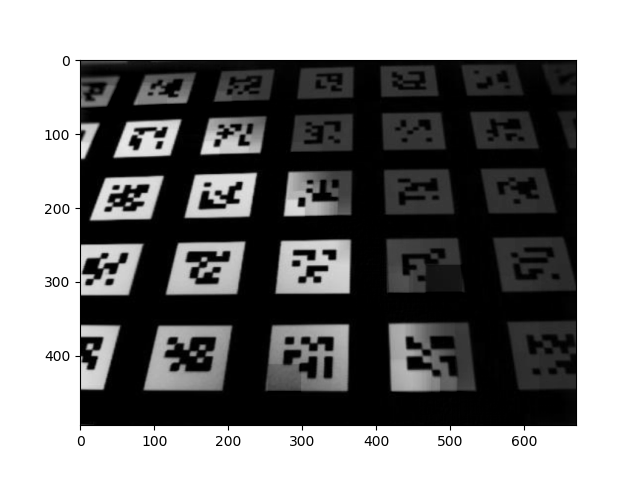

In [12]:
img_q_op_res = morpho.openingResidue(img_q, 38, 38)

plt.figure()
plt.imshow(img_q_op_res, cmap='gray', vmin=0, vmax=255)

<IPython.core.display.Javascript object>


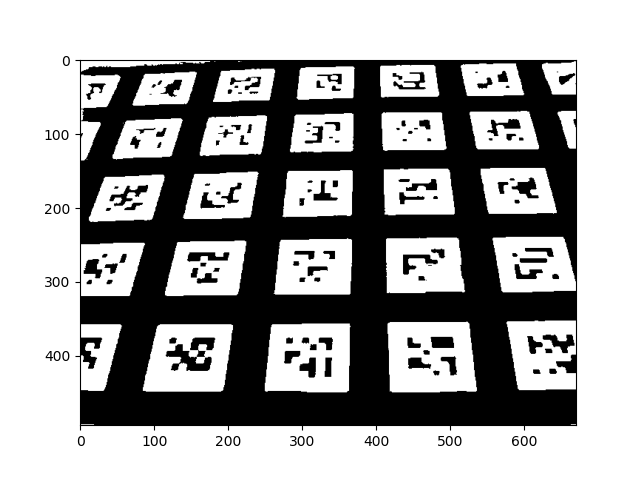

In [13]:
img_q_op_res_bin = img_q_op_res.copy()
img_q_op_res_bin[img_q_op_res_bin < 15] = 0
img_q_op_res_bin[img_q_op_res_bin >= 15] = 1

plt.figure()
plt.imshow(img_q_op_res_bin, cmap='gray', vmin=0, vmax=1)

## Niblack method

We apply a local binarization to both images, but now with the Niblack Method that we have implemented.

<IPython.core.display.Javascript object>


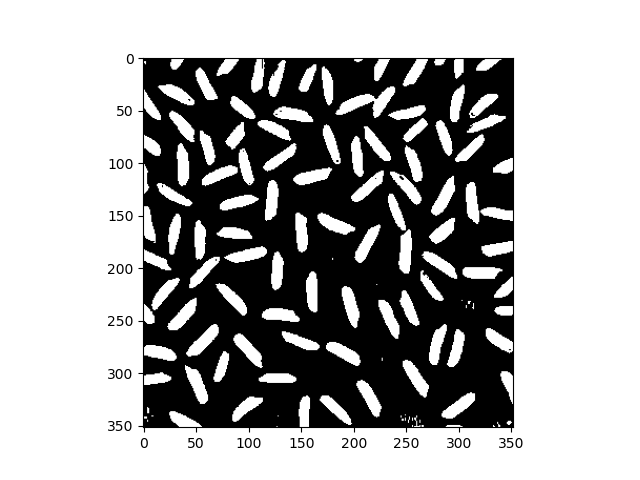

In [14]:
import Niblack as niblack

img_niblack = niblack.NiblackBinarization(img, 40, 40, 0.9)

plt.figure()
plt.imshow(img_niblack, cmap='gray', vmin=0, vmax=1)

<IPython.core.display.Javascript object>


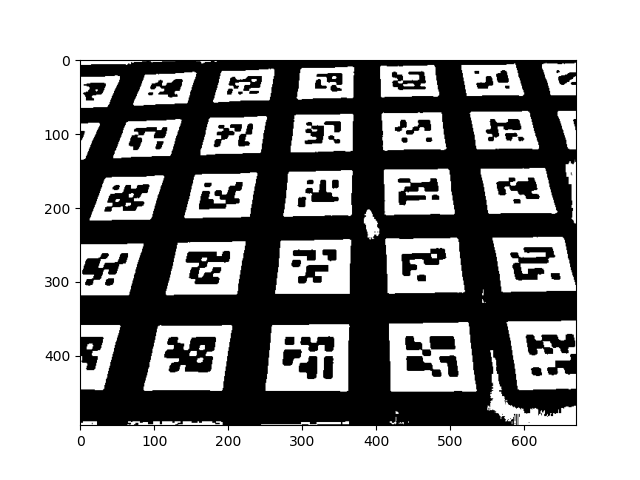

In [16]:
img_q_niblack = niblack.NiblackBinarization(img_q, 50, 50, 0.1)

plt.figure()
plt.imshow(img_q_niblack, cmap='gray', vmin=0, vmax=1)